# `Thera Bank Personal Loan Campaign`


## `Data Description `
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


## `Context:`
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## `Attributes Information:`


* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any.
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

In [183]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [185]:
# Read Dataset
df_orig = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df_orig.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [186]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [187]:
df_orig.shape

(5000, 14)

In [188]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [189]:
df = df_orig.copy()

In [105]:
# Remove ID Column - Doesn't add any value
df=df.drop('ID',axis=1)

In [190]:
# No missing values found
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

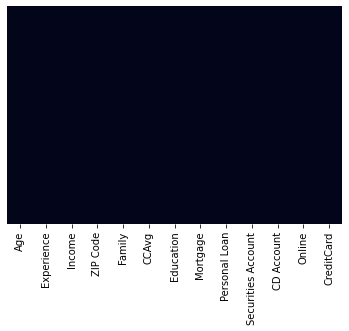

In [107]:
# View to check for missing values
sns.heatmap(df.isna(),yticklabels=False,cbar=False)

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [109]:
# Negative Experience Values - to be replaced
df[df["Experience"]<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


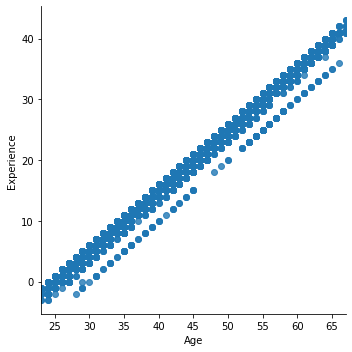

In [110]:
# Look for relationships with other variables
sns.lmplot(x="Age",y="Experience",data=df)

In [111]:
# Age has strongest relationship with Experience
df.corr()["Experience"].sort_values(ascending=False)

Experience            1.000000
Age                   0.994215
Online                0.013898
Education             0.013152
CD Account            0.010353
CreditCard            0.008967
Securities Account   -0.001232
Personal Loan        -0.007413
Mortgage             -0.010582
ZIP Code             -0.028626
Income               -0.046574
CCAvg                -0.050077
Family               -0.052563
Name: Experience, dtype: float64

In [112]:
# Replace negative values with NA
df.loc[df["Experience"] < 0.0, "Experience"] = np.NAN

In [117]:
temp_DF = pd.DataFrame(df.groupby('Age')["Experience"].median())
temp_DF.head(5)

,Experience
Age,
23,0.0
24,0.0
25,1.0
26,1.0
27,2.0


In [114]:
temp_DF.index

Int64Index([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
            40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
            57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
           dtype='int64', name='Age')

In [118]:
# Find index for all rows with Experience as NA
miss_bool = df['Experience'].isnull()

In [119]:
#Replace NA values with median Experience per age
df.loc[miss_bool, 'Experience'] = df.loc[miss_bool, 'Age'].apply(lambda x: temp_DF.loc[x])


In [120]:
# Manually map values for Age as 23
df.loc[df['Age']==23,"Experience"]=0

In [121]:
# Check missing values again
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [20]:
### Univariate analysis

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [123]:
df.nunique().sort_values(ascending=False)

ZIP Code              467
Mortgage              347
Income                162
CCAvg                 108
Age                    45
Experience             44
Family                  4
Education               3
CreditCard              2
Online                  2
CD Account              2
Securities Account      2
Personal Loan           2
dtype: int64

In [124]:
# Check for Skew / Kurt for all variables
df.skew().sort_values(ascending=False)

CD Account             3.691714
Personal Loan          2.743607
Securities Account     2.588268
Mortgage               2.104002
CCAvg                  1.598443
CreditCard             0.904589
Income                 0.841339
Education              0.227093
Family                 0.155221
Experience            -0.014106
Age                   -0.029341
Online                -0.394785
ZIP Code             -12.500221
dtype: float64

In [125]:
df.kurt().sort_values(ascending=False)

ZIP Code              486.204272
CD Account             11.633404
Personal Loan           5.529589
Mortgage                4.756797
Securities Account      4.701013
CCAvg                   2.646706
Income                 -0.044244
Experience             -1.139354
Age                    -1.153067
CreditCard             -1.182191
Family                 -1.403586
Education              -1.546116
Online                 -1.844883
dtype: float64

In [126]:
# Check for value counts for all categorical features
for feature in ['ZIP Code','Family','Education','Securities Account','CD Account','Online','CreditCard']:
    print(df[feature].value_counts(normalize=True).sort_values(ascending=False))
    print('\n')

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
9307     0.0002
94965    0.0002
94404    0.0002
90813    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64


1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64


1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64


0    0.8956
1    0.1044
Name: Securities Account, dtype: float64


0    0.9396
1    0.0604
Name: CD Account, dtype: float64


1    0.5968
0    0.4032
Name: Online, dtype: float64


0    0.706
1    0.294
Name: CreditCard, dtype: float64




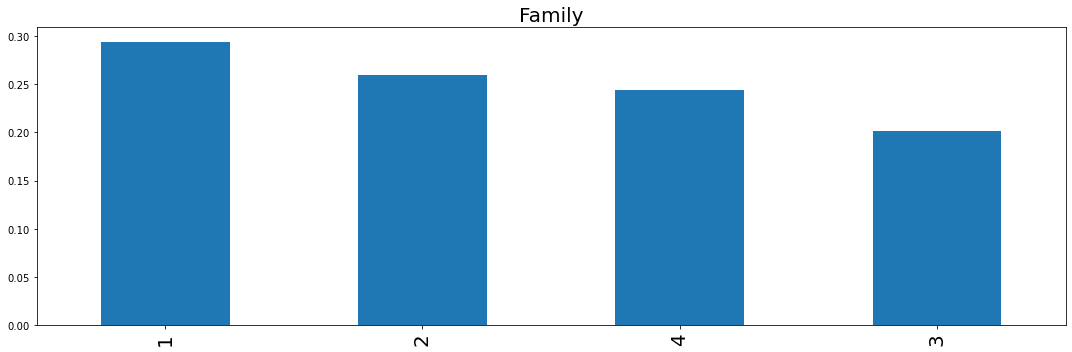

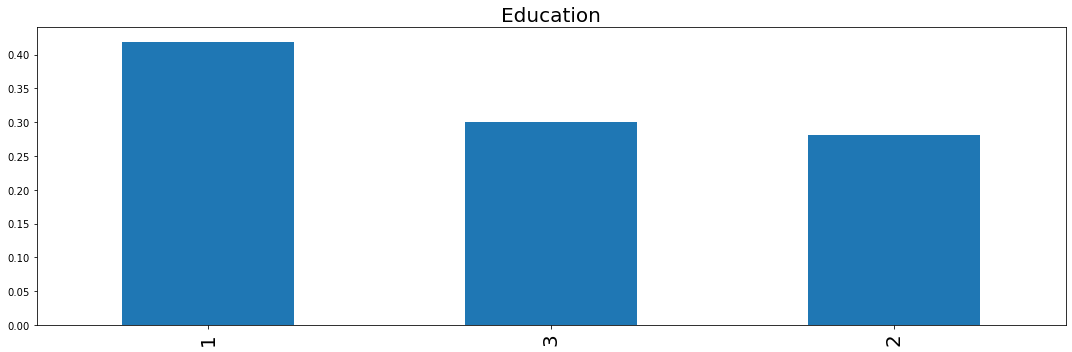

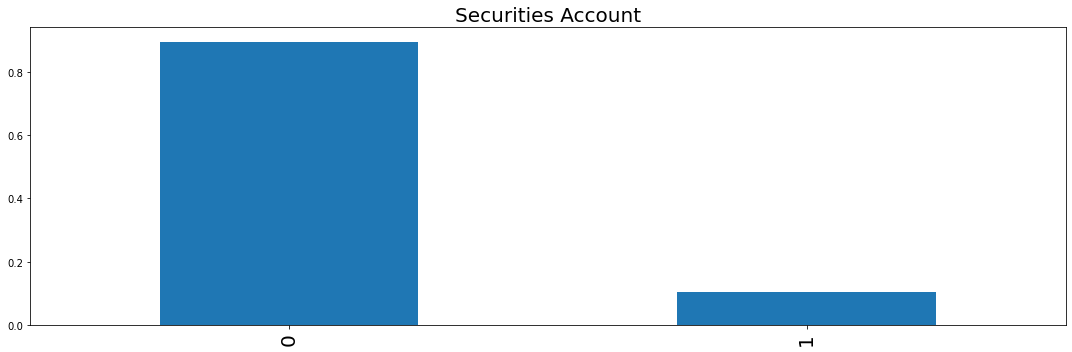

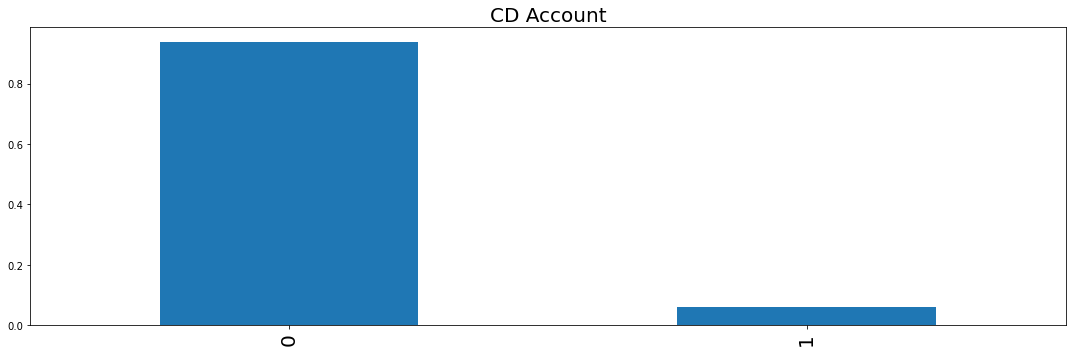

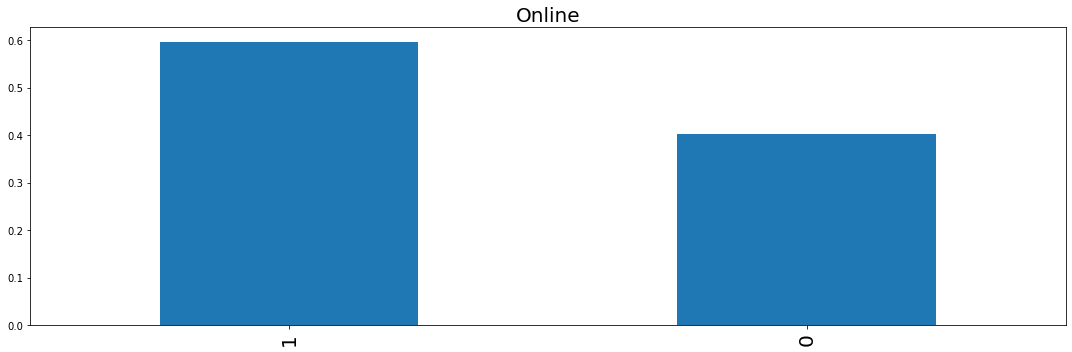

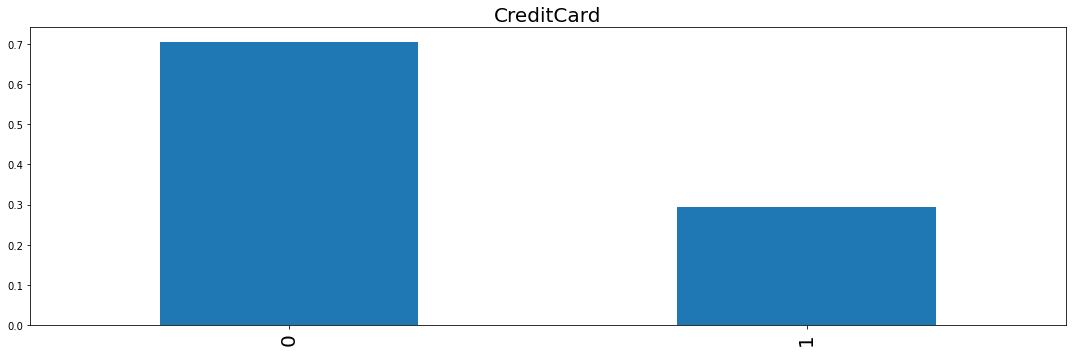

In [26]:
# Plot value counts for all categorical features
for feature in ['Family','Education','Securities Account','CD Account','Online','CreditCard']:
    df[feature].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(15,5))
    plt.xticks(fontsize=20);
    plt.title(feature,fontsize=20)
    plt.tight_layout()
    plt.show()


In [129]:
# Contingency tables are use to analyse relationships between categorical variables 

# Check for relationship between features and output variables
def get_ct(df,var):
   ct_res = pd.crosstab(df[var],df['Personal Loan'],margins=True)
   ct_res['Accepted (%)'] = round(ct_res[1]/ct_res['All']*100,2)
   return ct_res.drop(columns='All')

In [130]:
# Check for relationship between features and output variables taking into account third features - Stratified Contigency Features
def get_stra_ct(df,stra_var,var):
   ct_res = pd.crosstab(index=[df[stra_var],df[var]],columns=df['Personal Loan'],margins=True)
   ct_res['Approved (%)'] = round(ct_res[1]/ct_res['All']*100,2)
   return ct_res.drop(columns='All').drop('All',level=0)

In [131]:
# Notice variation in Personal Loan across Family
get_ct(df,'Family')

Personal Loan,0,1,Accepted (%)
Family,,,
1,1365,107,7.27
2,1190,106,8.18
3,877,133,13.17
4,1088,134,10.97
All,4520,480,9.60


In [132]:
# Variation consistent even with including Online variable
get_stra_ct(df,'Online','Family')

Personal Loan    0   1  Approved (%)
Online Family                       
0      1       550  39          6.62
       2       506  42          7.66
       3       348  51         12.78
       4       423  57         11.88
1      1       815  68          7.70
       2       684  64          8.56
       3       529  82         13.42
       4       665  77         10.38

In [133]:
# Notice variation in Personal Loan across Education
get_ct(df,'Education')

Personal Loan,0,1,Accepted (%)
Education,,,
1,2003,93,4.44
2,1221,182,12.97
3,1296,205,13.66
All,4520,480,9.60


In [134]:
# Variation consistent even with including Credit Card variable
get_stra_ct(df,'CreditCard','Education')

Personal Loan            0    1  Approved (%)
CreditCard Education                         
0          1          1402   61          4.17
           2           873  130         12.96
           3           918  146         13.72
1          1           601   32          5.06
           2           348   52         13.00
           3           378   59         13.50

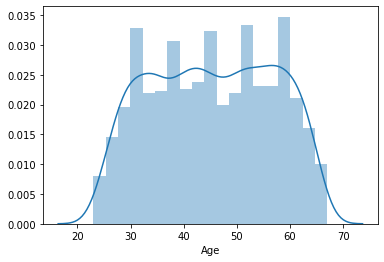

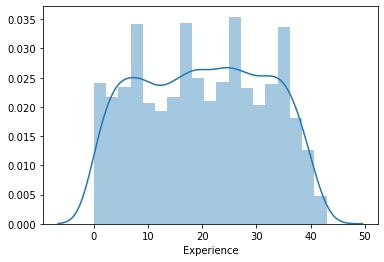

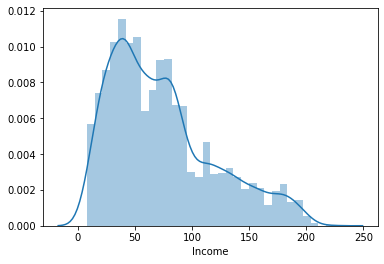

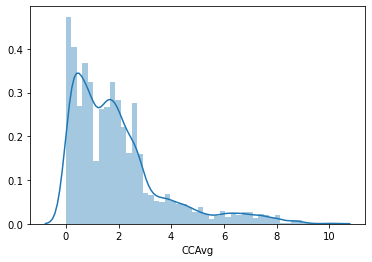

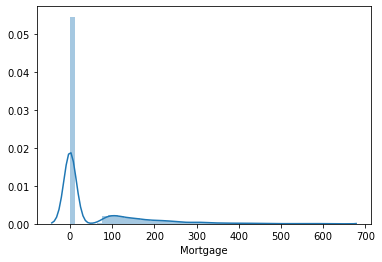

In [135]:
# Dist Plots - Mortgage interesting - lot of 0 Values 
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(df[i])
    plt.show()

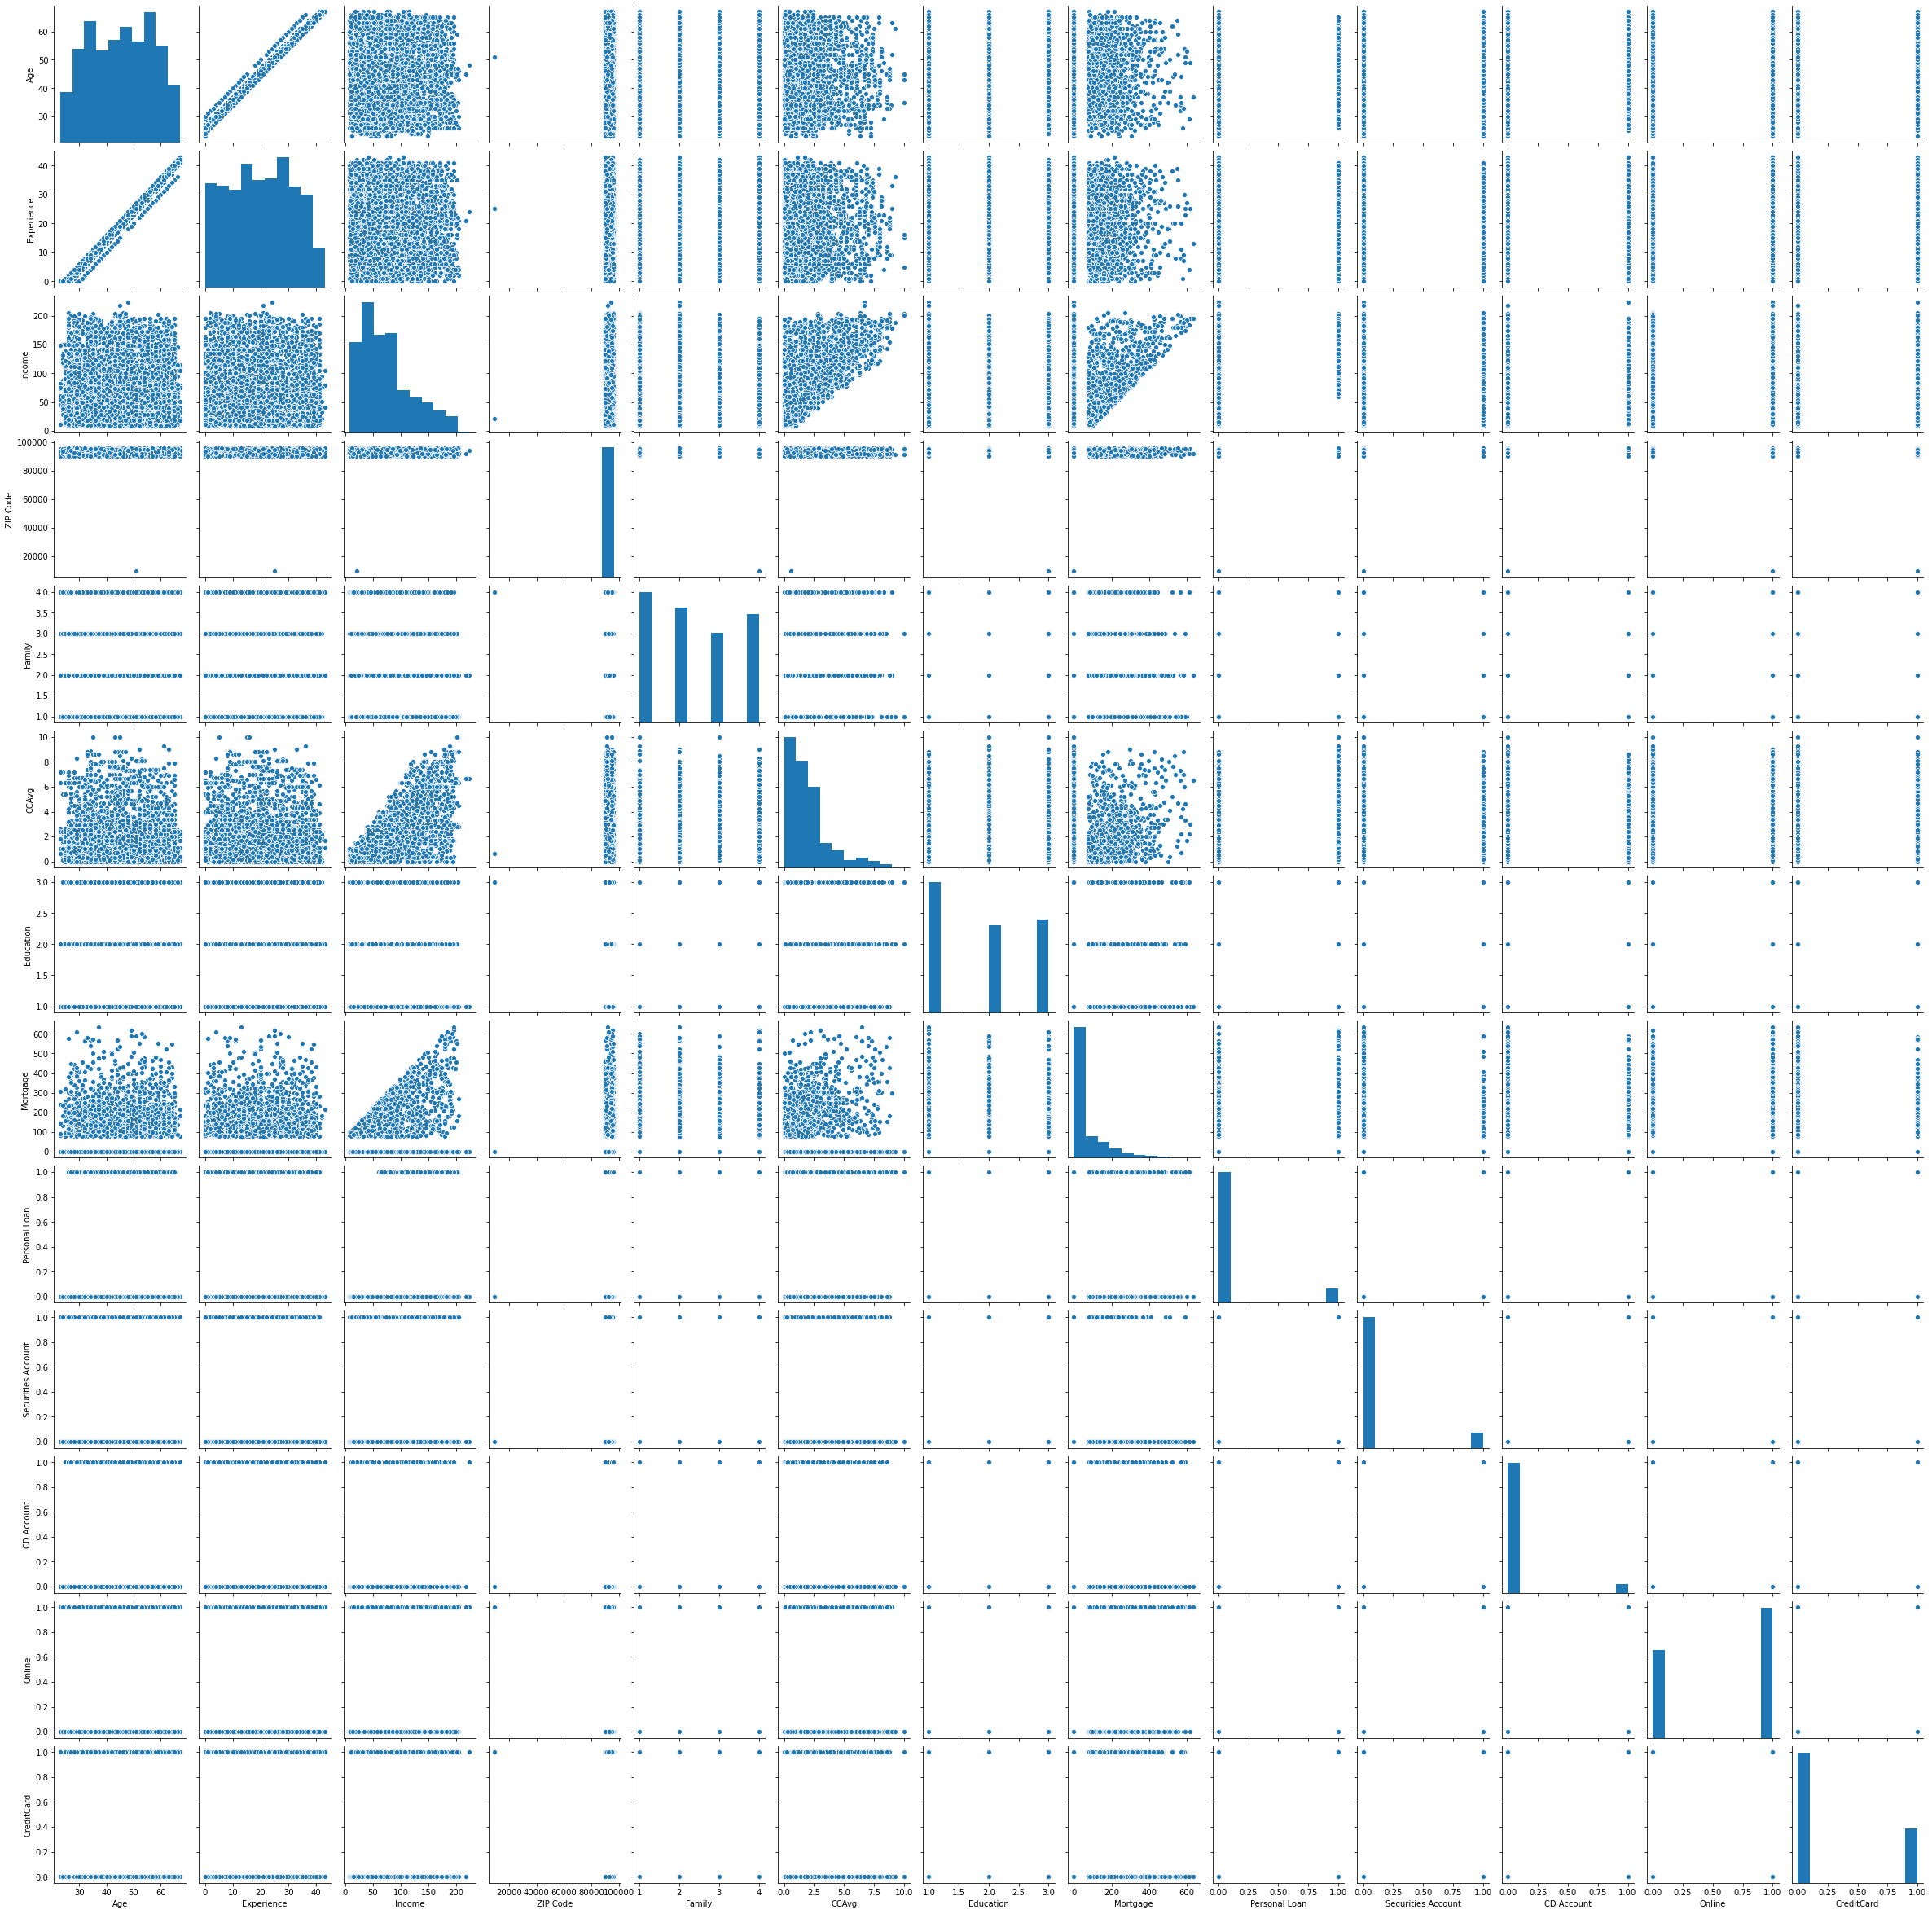

In [36]:
# Pairplot
sns.pairplot(df)

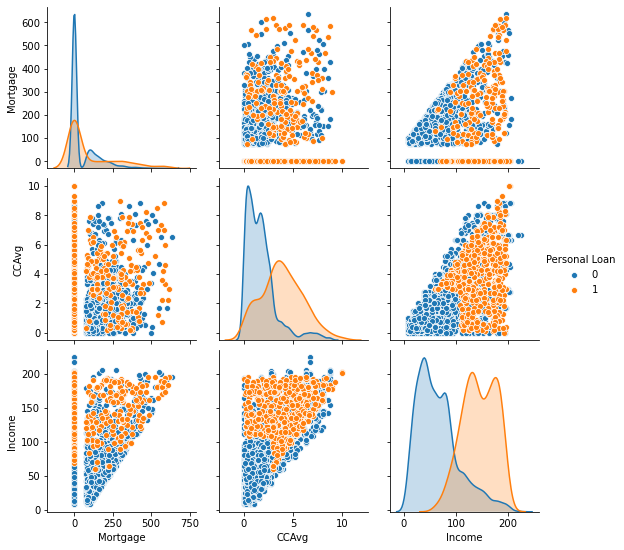

In [140]:
# Breaking down pairplot including Personal Loan
sns.pairplot(df, x_vars=['Mortgage', 'CCAvg', 'Income'], y_vars=['Mortgage', 'CCAvg', 'Income'],hue="Personal Loan")

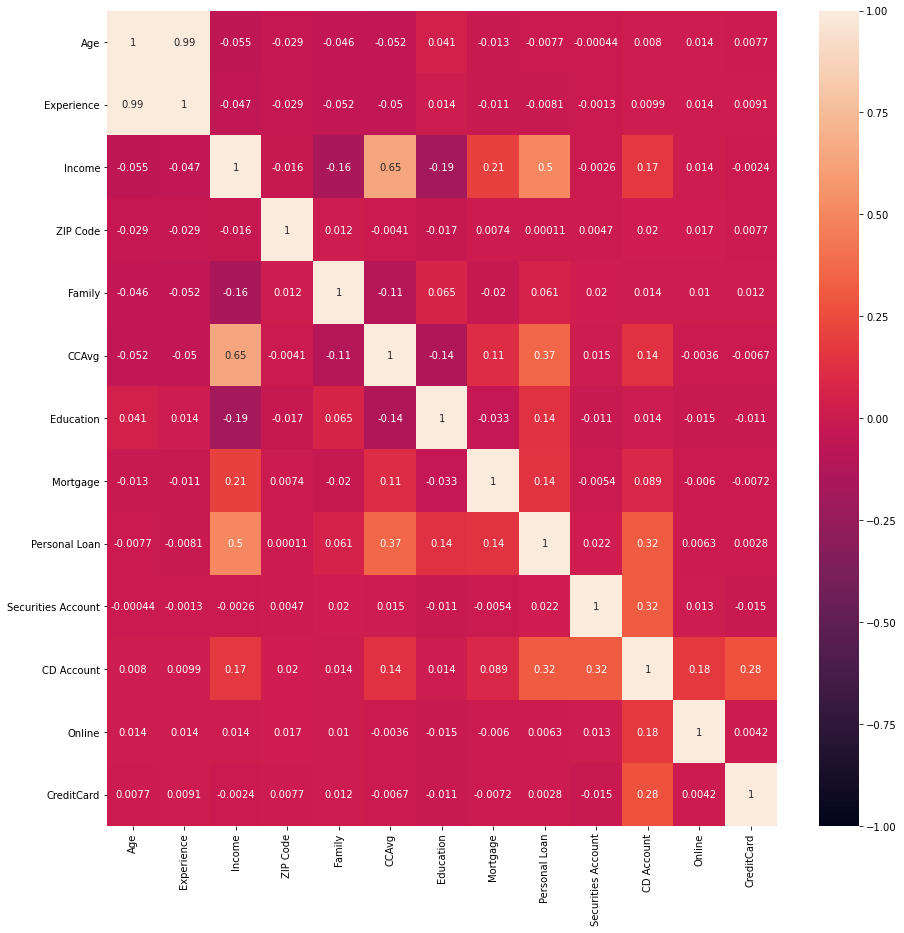

In [143]:
# CCAvg - Income interesting positive relationship
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

Personal Loan    0    1
ZIP Code               
9307           1.0  0.0
90005          1.0  0.0
90007          1.0  0.0
90009          1.0  0.0
90011          1.0  0.0
...            ...  ...
96091          1.0  0.0
96094          1.0  0.0
96145          1.0  0.0
96150          1.0  0.0
96651          1.0  0.0

[467 rows x 2 columns]




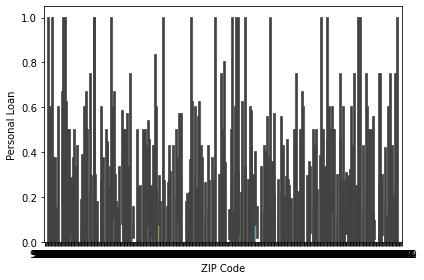

Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656




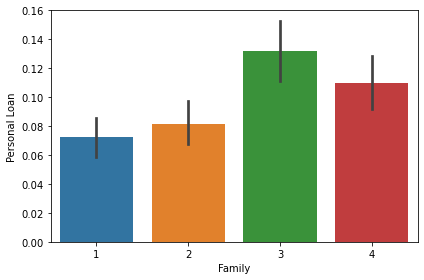

Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576




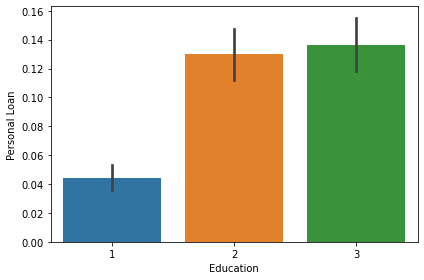

Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943




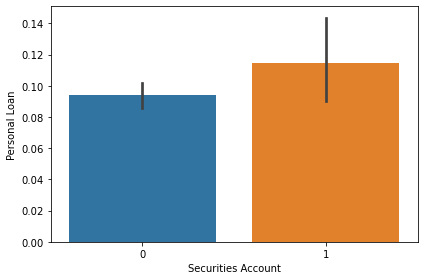

Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576




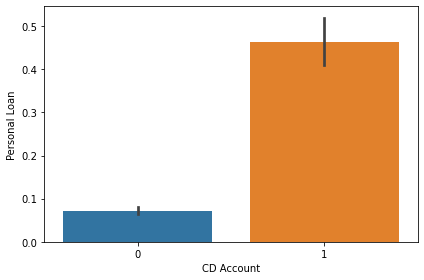

Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752




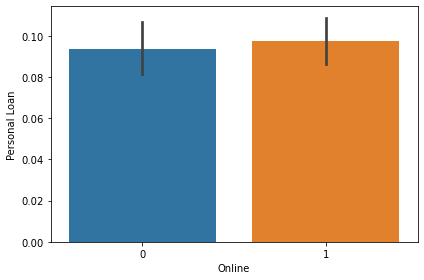

Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279




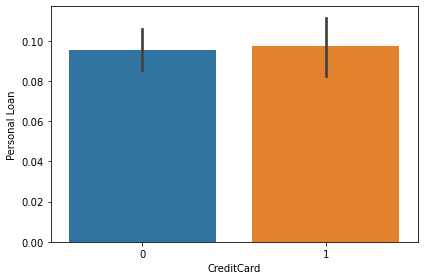

In [144]:
# Test different categorical variable relationship with Personal Loan variable
for i in ['ZIP Code','Family','Education','Securities Account','CD Account','Online','CreditCard']:
    print(pd.crosstab(df[i],df['Personal Loan'],normalize='index'))
    print('\n')
    sns.barplot(x=i,y='Personal Loan',data=df)
    plt.tight_layout()
    plt.show()

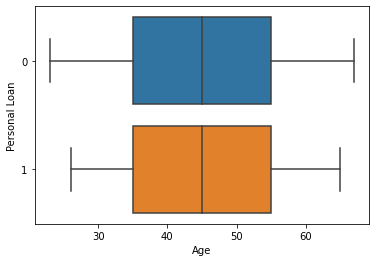

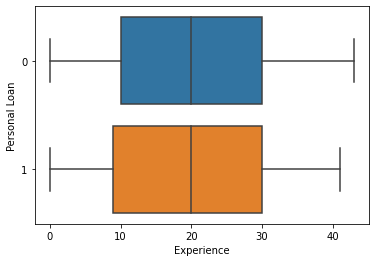

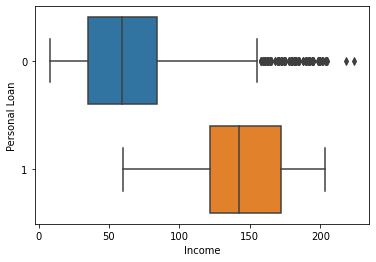

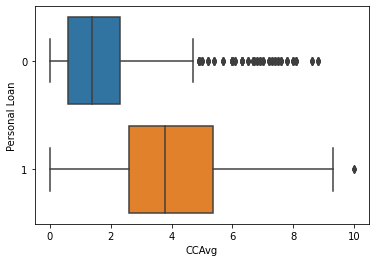

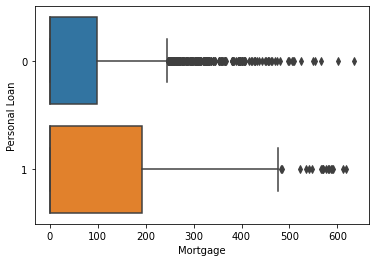

In [145]:
# Continous variable distribution across Loan Status column - Experience, Age not interesting
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.boxplot(x=i,y='Personal Loan',data=df,orient='h')#.set_yscale('log')
    plt.show()
    print('\n\n')

In [147]:
# Bucketing to visualize data - You can use both quantile (qcut) or manual (cut) functions
df['Income_Bucket'] = pd.DataFrame(pd.qcut(df['Income'],8))
df['CCAvg_Bucket'] = pd.DataFrame(pd.qcut(df['CCAvg'],8))
df['Mortgage_Bucket'] = pd.DataFrame(pd.cut(df['Mortgage'],[0,100, 144,219,400,510, 635]))

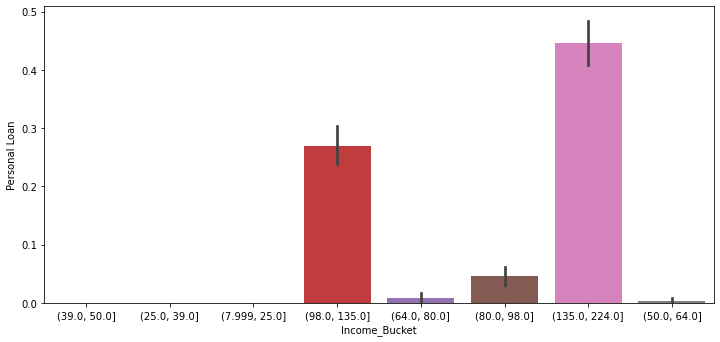

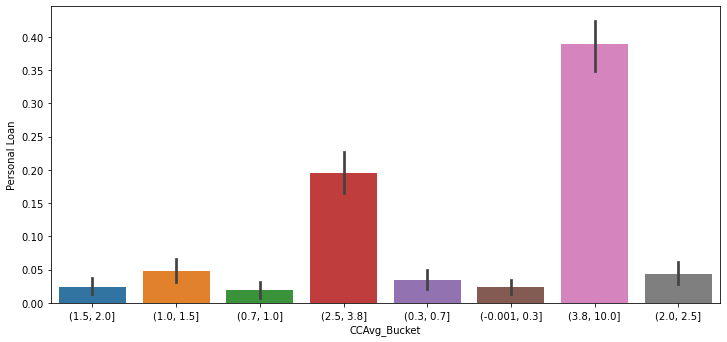

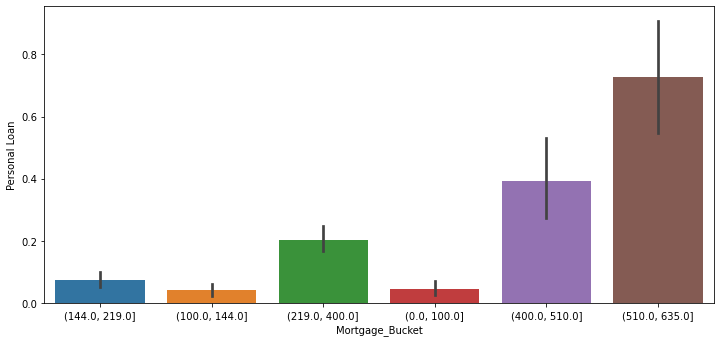

<Figure size 432x288 with 0 Axes>

In [148]:
# Plot variation of Personal Loan across different cut variables 
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
sns.barplot(df['Income_Bucket'],df['Personal Loan'].astype(float))
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
sns.barplot(df['CCAvg_Bucket'],df['Personal Loan'].astype(float))
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
sns.barplot(df['Mortgage_Bucket'],df['Personal Loan'].astype(float))
plt.show()

plt.tight_layout()


Text(0.5, 1.0, 'Age')

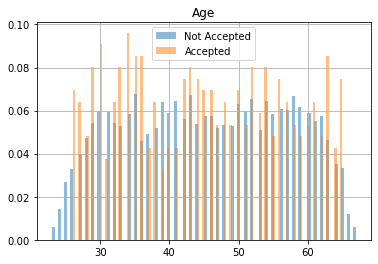

In [149]:
# Hist Plots for numerical variables for both classes
df['Age'][df['Personal Loan'] == 0].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['Age'][df['Personal Loan'] == 1].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('Age')

Text(0.5, 1.0, 'Experience')

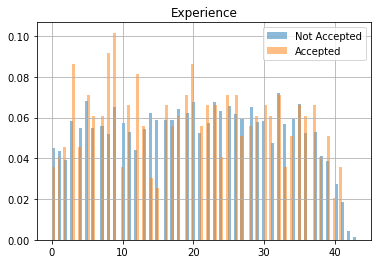

In [46]:
df['Experience'][df['Personal Loan'] == 0].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['Experience'][df['Personal Loan'] == 1].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('Experience')

Text(0.5, 1.0, 'Mortgage')

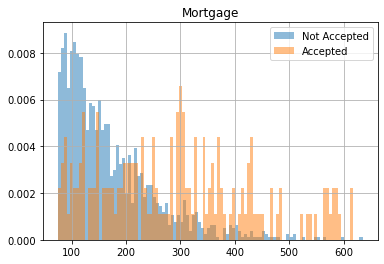

In [47]:
df['Mortgage'][(df['Personal Loan'] == 0) & (df['Mortgage']>0)].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['Mortgage'][(df['Personal Loan'] == 1) & (df['Mortgage']>0)].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('Mortgage')
#Mortgage definitely skewed - perhaps Normalize , In addition, Higher Mortgage - more probable to take loan 

Text(0.5, 1.0, 'Income')

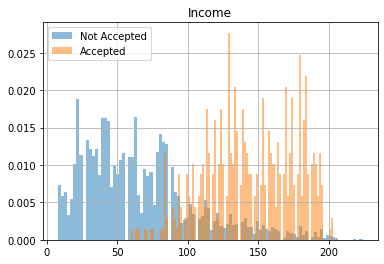

In [48]:
df['Income'][df['Personal Loan'] == 0].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['Income'][df['Personal Loan'] == 1].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('Income')
# Higher income, accept more loan

Text(0.5, 1.0, 'CCAvg')

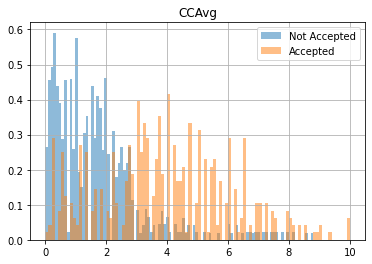

In [49]:
df['CCAvg'][df['Personal Loan'] == 0].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['CCAvg'][df['Personal Loan'] == 1].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('CCAvg')
#Spend more - use Personal Loan more. 

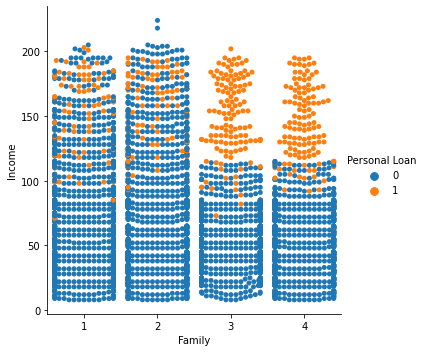

In [153]:
# Interesting plot breaks down the relationship for Personal Loan across Income / Family
sns.catplot(x='Family',y='Income',hue='Personal Loan',data=df,kind='swarm')

In [154]:
# Class Imbalance Issues - 10% - how to fix it ? - Use model parameters or set thresholds on precision recall curve to take it into account
df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

Text(0.5, 1.0, 'Personal Loan')

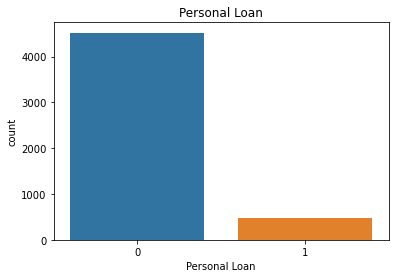

In [155]:
sns.countplot(x='Personal Loan',data=df)
plt.title('Personal Loan')

In [156]:
#Summary stats for Personal Loan across all the remaining features - aligns with what we have seen above
df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.156416,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [157]:
df.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [192]:
# Check for Multicolliniarity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']].values, i) for i in range(df[['Age','Experience','Income','CCAvg','Personal Loan']].shape[1])]
vif['variable'] = df[['Age','Experience','Income','CCAvg','Personal Loan']].columns
vif.sort_values(by='VIF',ascending=False)
# Drop age column due to multi collinearity - has very strong relationship with age

,VIF,variable
0,24.258630,Age
1,16.522119,Experience
2,7.173289,Income
3,3.852694,CCAvg
4,1.371239,Personal Loan


In [159]:
# Convert relevant feature to Categorical variables
for feature in ['ZIP Code','Family','Education','Securities Account','CD Account','Online','CreditCard']:
    df[feature] = df[feature].astype('category')

## Model building using Logistic Regression from Sklearn¶

In [161]:
# Keep a copy of the data
df_copy = df.copy()

In [196]:
#df = df_copy.copy()

In [197]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Income_Bucket', 'CCAvg_Bucket',
       'Mortgage_Bucket'],
      dtype='object')

In [198]:
# Drop columns not relevant for model based on EDA
df.drop(["ZIP Code",'Income_Bucket', 'CCAvg_Bucket','Mortgage_Bucket','Age'],axis=1,inplace=True)

In [199]:
df = pd.get_dummies(df, drop_first=True)

In [166]:
## Define X and Y variables
X = df.drop(['Personal Loan'], axis=1)
Y = df['Personal Loan'].astype('category')


In [168]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [169]:
#X_train, X_test, y_train, y_test
# Build the logistic regression models using statsmodel
import statsmodels.api as sm
logit = sm.Logit(y_train,sm.add_constant(X_train))
lg = logit.fit()
print(lg.summary())
#Remove Mortgage,Family_2,Experience based on p values to build a new model

Optimization terminated successfully.
         Current function value: 0.119924
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Sat, 10 Oct 2020   Pseudo R-squ.:                  0.6253
Time:                        13:14:54   Log-Likelihood:                -419.73
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                1.057e-291
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.4888      0.661    -18.884      0.000     -13.785     -11.193

In [170]:
# Run the same model using sklearn
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(random_state=7)

In [171]:
logreg.predict_proba(X_test)

array([[9.94013457e-01, 5.98654341e-03],
       [9.19742576e-01, 8.02574243e-02],
       [9.46093945e-01, 5.39060545e-02],
       ...,
       [9.96750341e-01, 3.24965895e-03],
       [9.95555617e-01, 4.44438264e-03],
       [9.99796425e-01, 2.03574755e-04]])

In [172]:
# Use the concept of threhold as below 
threshold = 0.7
y_predict = np.where(logreg.predict_proba(X_test)[:,1]>threshold,1,0)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Loan Status,Predicted Loan Status
3406,12.0,34,2.0,0,0,1,0,0,1,0,0,0,1,0,0
757,28.0,81,1.8,0,0,1,0,1,0,1,0,0,0,0,0
3624,28.0,70,1.4,0,0,0,0,0,1,0,0,0,0,0,0
4544,4.0,80,2.5,0,0,1,0,0,0,0,0,1,0,0,0
3235,35.0,39,1.6,0,1,0,0,0,1,0,0,1,0,0,0


In [174]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9571428571428572

Testing accuracy 0.964

Confusion Matrix


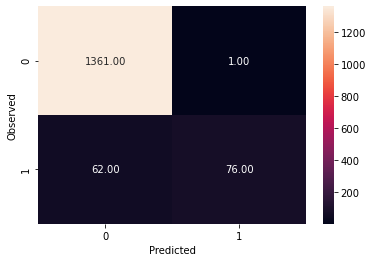

None

Recall: 0.5507246376811594

Precision: 0.987012987012987

F1 Score: 0.7069767441860465

Roc Auc Score: 0.7749952116452786


In [175]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
# Precision high - what we wanted based on our initial business analysis ( This could be diff if you decided to keep Recall as important)

In [96]:
# Another way to look at the precision - recall scores
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       0.99      0.55      0.71       138

    accuracy                           0.96      1500
   macro avg       0.97      0.77      0.84      1500
weighted avg       0.96      0.96      0.95      1500



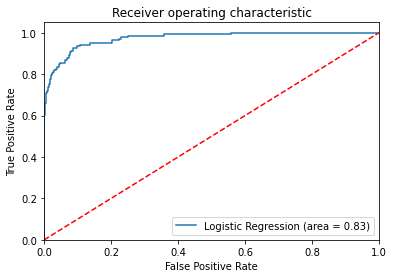

In [213]:
#AUC ROC curve - Better curve to use for class balanced problems
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic: f1=0.707 auc=0.880


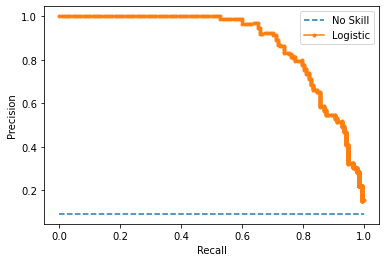

In [178]:
# Precision Recall Curve - Better curve to use for class imbalanced problems like this one

# calculate precision and recall for each threshold
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])
# calculate scores
lr_f1, lr_auc = f1_score(y_test,y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


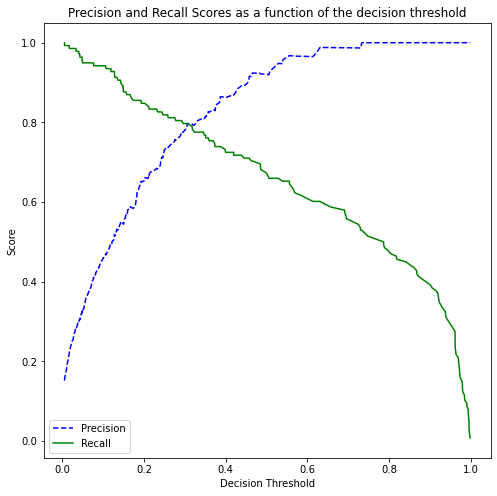

In [179]:
# Plot to help identify the key threhold to use
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
   
# Plot precision vs recall vs threshold
plot_precision_recall_vs_threshold(lr_precision, lr_recall, thresholds)

##### New Model with updated features

In [200]:
#Remove Mortgage,Family_2,Experience based on p value significance 
XNew = df.drop(['Personal Loan','Mortgage','Family_2','Experience'], axis=1)
YNew = df['Personal Loan'].astype('category')

In [201]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(XNew, YNew, test_size=0.30,random_state=7)

In [202]:
# Build the logistic regression models using statsmodel
import statsmodels.api as sm
logit_new = sm.Logit(y_train_new,sm.add_constant(X_train_new))
lg_new = logit_new.fit()
print(lg_new.summary())

Optimization terminated successfully.
         Current function value: 0.120275
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Sun, 11 Oct 2020   Pseudo R-squ.:                  0.6242
Time:                        08:02:43   Log-Likelihood:                -420.96
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                2.313e-294
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.3160      0.626    -19.688      0.000     -13.542     -11.090

In [204]:
# Calculate Odds Ratio here 
#Calculate Odds ratio from coff using formula
#odds ratio = exp(coeff)
#Calculate prob from odds ratio using formula
#prob = odds / (1+odds)

lgcoef = pd.DataFrame(lg_new.params,columns=['coef'])
lgcoef.loc[:,"Odds_ratio"]=np.exp(lgcoef.coef)
lgcoef['probability']=lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format ='{:.2f}'.format
lgcoef

,coef,Odds_ratio,probability,pval
const,-12.32,0.00,0.00,0.00
Income,0.06,1.06,0.51,0.00
CCAvg,0.19,1.20,0.55,0.00
Family_3,2.05,7.75,0.89,0.00
Family_4,1.91,6.73,0.87,0.00
Education_2,3.68,39.79,0.98,0.00
Education_3,3.89,48.99,0.98,0.00
Securities Account_1,-0.70,0.49,0.33,0.05
CD Account_1,3.49,32.91,0.97,0.00
Online_1,-0.62,0.54,0.35,0.00


In [205]:
# Filter by significant p value(p val < 0.05) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio",ascending=False)
pval_filter=lgcoef['pval']<=0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,3.89,48.99,0.98,0.00
Education_2,3.68,39.79,0.98,0.00
CD Account_1,3.49,32.91,0.97,0.00
Family_3,2.05,7.75,0.89,0.00
Family_4,1.91,6.73,0.87,0.00
CCAvg,0.19,1.20,0.55,0.00
Income,0.06,1.06,0.51,0.00
Online_1,-0.62,0.54,0.35,0.00
Securities Account_1,-0.70,0.49,0.33,0.05
CreditCard_1,-0.96,0.38,0.28,0.00


In [206]:
# Run the same model using sklearn
logreg_new = LogisticRegression(random_state=7)
logreg_new.fit(X_train_new, y_train_new)  

LogisticRegression(random_state=7)

In [207]:
# Use the concept of threhold as below 
threshold = 0.7
y_predict_new = np.where(logreg_new.predict_proba(X_test_new)[:,1]>threshold,1,0)
y_predict_new

array([0, 0, 0, ..., 0, 0, 0])

Trainig accuracy 0.9571428571428572

Testing accuracy 0.966

Confusion Matrix


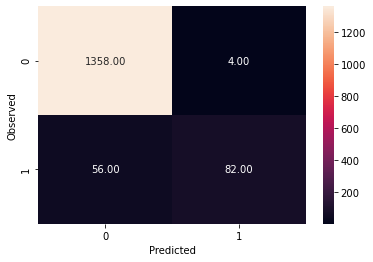

None

Recall: 0.5942028985507246

Precision: 0.9534883720930233

F1 Score: 0.7321428571428571

Roc Auc Score: 0.7956330204941582


In [208]:
print("Trainig accuracy",logreg_new.score(X_train_new,y_train_new))  
print()
print("Testing accuracy",logreg_new.score(X_test_new, y_test_new))
print()
print('Confusion Matrix')
print(draw_cm(y_test_new,y_predict_new))
print()
print("Recall:",recall_score(y_test_new,y_predict_new))
print()
print("Precision:",precision_score(y_test_new,y_predict_new))
print()
print("F1 Score:",f1_score(y_test_new,y_predict_new))
print()
print("Roc Auc Score:",roc_auc_score(y_test_new,y_predict_new))

#### Above model is better as i dont keep the features that are not statistically significant & my Precision - Recall are around the same as before

#### Run Naive Bayes Classifier to compare the models

In [90]:
# Naive Bayes Classifier as an example 
nb_model = GaussianNB()
nb_model.fit(X_train_new,y_train_new)

GaussianNB()

In [91]:
y_predict_nb = nb_model.predict(X_test_new)

#### Run Logistic Regression Model taking into account the class imbalance problem

In [92]:
##New Model incorporates Class Imbalanced Issue
weights = {0:1.0, 1:10.0}
logreg_imb = LogisticRegression(class_weight=weights)
logreg_imb.fit(X_train_new, y_train_new) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1.0, 1: 10.0})

In [93]:
# Use the concept of threhold as below 
threshold = 0.7
y_predict_imb = np.where(logreg_imb.predict_proba(X_test_new)[:,1]>threshold,1,0)
y_predict_imb

array([0, 0, 0, ..., 0, 0, 0])

Trainig accuracy 0.8937142857142857

Testing accuracy 0.8986666666666666

Confusion Matrix


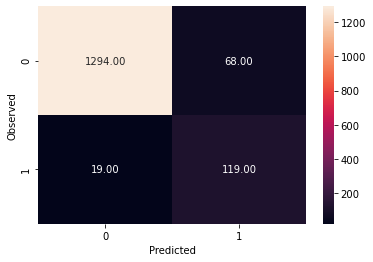

None

Recall: 0.8623188405797102

Precision: 0.6363636363636364

F1 Score: 0.7323076923076922

Roc Auc Score: 0.9061961310093852


In [94]:
print("Trainig accuracy",logreg_imb.score(X_train_new,y_train_new))  
print()
print("Testing accuracy",logreg_imb.score(X_test_new, y_test_new))
print()
print('Confusion Matrix')
print(draw_cm(y_test_new,y_predict_imb))
print()
print("Recall:",recall_score(y_test_new,y_predict_imb))
print()
print("Precision:",precision_score(y_test_new,y_predict_imb))
print()
print("F1 Score:",f1_score(y_test_new,y_predict_imb))
print()
print("Roc Auc Score:",roc_auc_score(y_test_new,y_predict_imb))

#### Model Comparisons for all the 4 Models - You can use AUC as guidance metric

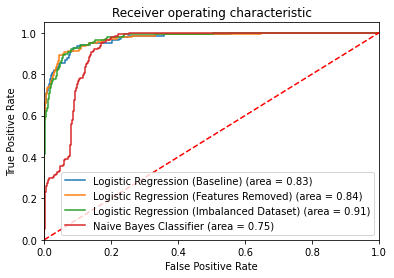

In [214]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (Baseline) (area = %0.2f)' % logit_roc_auc)

logit_new_roc_auc = roc_auc_score(y_test_new, logreg_new.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(y_test_new, logreg_new.predict_proba(X_test_new)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (Features Removed) (area = %0.2f)' % logit_new_roc_auc)

logit_imb_roc_auc = roc_auc_score(y_test_new, logreg_imb.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(y_test_new, logreg_imb.predict_proba(X_test_new)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (Balanced Dataset) (area = %0.2f)' % logit_imb_roc_auc)


nb_roc_auc = roc_auc_score(y_test_new, nb_model.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(y_test_new, nb_model.predict_proba(X_test_new)[:,1])
plt.plot(fpr, tpr, label='Naive Bayes Classifier (area = %0.2f)' % nb_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

####Link references 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
https://www.tutorialspoint.com/scikit_learn/scikit_learn_logistic_regression.htm    